In [1]:
import numpy as np
import pandas as pd 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
cars = pd.read_csv('Car details v3.csv')

In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Let's findout how many null values are present
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# Let's go ahead and drop the null values
cars.dropna(inplace=True)

In [7]:
# Let's goahead and check the name of few cars
for i in range(6):
    index = np.random.randint(1,7000)
    print(cars['name'].iloc[index])

Maruti Swift VXI Optional
Toyota Etios VX
Ford Figo Diesel Titanium
Maruti Swift Dzire VXI
Maruti Swift ZDi
Maruti Ritz LXi


In [8]:
# Different car belongs to different companies,have diferent model.There are no fixed set of names.
# It would be very difficult to use this column to train our model. It will act as noise in the data which will only reduce the performence of the model.
# Let's go ahead and drop this column
cars.drop('name',axis = 1,inplace = True)

<AxesSubplot:xlabel='year', ylabel='count'>

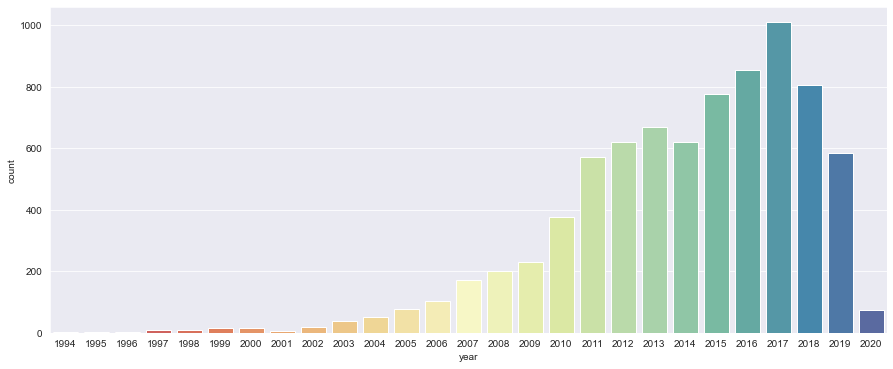

In [9]:
# Let's check the year column
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='year',data=cars,palette='Spectral')

In [10]:
# Let's try to use year in better way.As the list is from 2020.
# We will add a new column number_of_year which will tell how old the car is
cars['number_of_year'] = cars['year'].apply(lambda x:2020-x)

# We will then drop the 'year' column
cars.drop('year',axis=1,inplace=True)

<AxesSubplot:xlabel='fuel', ylabel='count'>

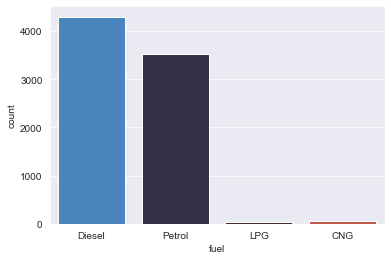

In [11]:
# Fuel Column
sns.countplot(x='fuel',data=cars,palette='icefire')

**Majority of car ran on Diesel and Petrol.**

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

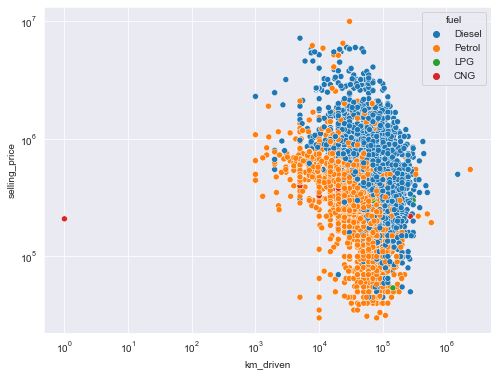

In [12]:
# Lets check the km_driven column.
plt.figure(figsize=(8,6))
plt.yscale('log')
plt.xscale('log')
sns.scatterplot(x='km_driven',y='selling_price',data=cars,hue='fuel')

**Diesel-car were sold at higher price then Petrol-car**

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64




Text(0, 0.5, 'seller')

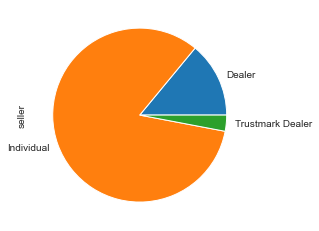

In [13]:
# Let's check seller type of the car
print(cars['seller_type'].value_counts())
print('\n')

cars.groupby('seller_type').size().plot(kind='pie',y='seller')
plt.ylabel('seller')

**Majority of people did'nt go to any dealer to sell there car.**

Manual       6865
Automatic    1041
Name: transmission, dtype: int64




Text(0, 0.5, 'transmission')

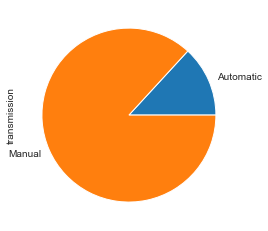

In [14]:
# Let's check the transmission of cars
print(cars['transmission'].value_counts())
print('\n')

cars.groupby('transmission').size().plot(kind='pie',y='type')
plt.ylabel('transmission')

**Majority of car had Manual transmission**

In [15]:
# Let's check the owner column
print(cars['owner'].value_counts())
print('\n')

plt.figure(figsize=(8,5))
# sns.countplot(x='owner',data=cars)
cars['owner'].iplot(kind='hist')

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64




<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='transmission', ylabel='count'>

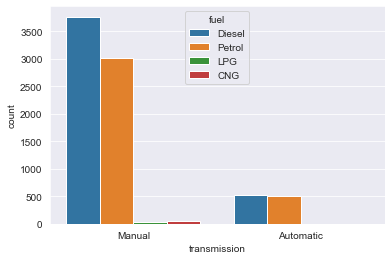

In [16]:
# Let's check the fuel and transmission column together
sns.countplot(x='transmission',data=cars,hue='fuel')

In [17]:
# Let's check the mileage,engine and max_power column
cars['mileage'].iloc[:3]

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
Name: mileage, dtype: object

In [18]:
cars['engine'].iloc[:3]

0    1248 CC
1    1498 CC
2    1497 CC
Name: engine, dtype: object

In [19]:
cars['max_power'].iloc[:3]

0        74 bhp
1    103.52 bhp
2        78 bhp
Name: max_power, dtype: object

In [20]:
# Let's remove the kmpl, CC and bhp from the values.We will create a new columns and delete these columns

# function to remove kmpl,CC and bhp 
def remove(car):
    kmpl,cc,bhp = car
    
    # for mileage(kmpl/kmpg)
    kmpl = kmpl.split(' ')[0]
    
    # for engine(CC)
    cc = cc.split(' ')[0]
    
    # for max_power
    bhp = bhp.split(' ')[0]
    
    return kmpl,cc,bhp

# Let's apply the above function.
# We will create three new_columns mileage(kmpl),engine(cc).max_power(bhp) and remove the old columns
cars[['mileage(kmpl)','engine(cc)','max_power(bhp)']] = cars[['mileage','engine','max_power']].apply(remove,axis=1,result_type='expand')


# removing the old columns
cars.drop(['mileage','engine','max_power'],axis = 1,inplace=True)

In [21]:
# Let's remove the torque column as well
cars.drop('torque',axis = 1,inplace=True)

In [22]:
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,number_of_year,mileage(kmpl),engine(cc),max_power(bhp)
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,6,23.4,1248,74
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,6,21.14,1498,103.52
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,14,17.7,1497,78
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,10,23.0,1396,90
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,13,16.1,1298,88.2


In [23]:
# Let's convert the categorical column usng one hot encoding.
cat_cols = ['fuel','seller_type','transmission','owner']

dummies = pd.get_dummies(cars[cat_cols],drop_first=True)

# Let's drop the cat_cols
cars.drop(cat_cols,axis=1,inplace=True)

# Let's concatenate the dummies and cars
cars = pd.concat([cars,dummies],axis = 1)

In [24]:
# Let's divide the columns into X (input variable) and y (output variable)
X = cars.drop('selling_price',axis = 1)
y = cars['selling_price']

In [25]:
# Let's split the data into train_set and test_set
from sklearn.model_selection import train_test_split

# We will use 20% of data as test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20)

In [26]:
# Now let's scale the numerical columns in the cars data set
num_cols =['number_of_year','km_driven','seats','mileage(kmpl)','engine(cc)','max_power(bhp)']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [31]:
# # Let's convert the X_train and y_train in to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's create our Models

**Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression

# to evaluate the model
from sklearn import metrics

In [34]:
linear = LinearRegression()

linear.fit(X_train,y_train)

LinearRegression()

In [35]:
# prediction
pred_linear = linear.predict(X_test)

Model Evaluation

In [36]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test,pred_linear)

# Root Mean Squared Error
rmse_linear = np.sqrt(mse)

# r_2 score
r2_linear = metrics.r2_score(y_test,pred_linear)

print(f'MEAN SQUARED ERROR FOR LINEAR REGRESSION IS: {mse}')
print('\n')
print(f'ROOT MEAN SQUARED ERROR FOR LINEAR REGRESSION IS: {rmse_linear}')
print('\n')
print(f'R2 SCORE FOR LINEAR REGRESSION IS: {r2_linear}')

MEAN SQUARED ERROR FOR LINEAR REGRESSION IS: 187973190852.44873


ROOT MEAN SQUARED ERROR FOR LINEAR REGRESSION IS: 433558.7513272552


R2 SCORE FOR LINEAR REGRESSION IS: 0.7007998031310376


Text(0, 0.5, 'predicted value')

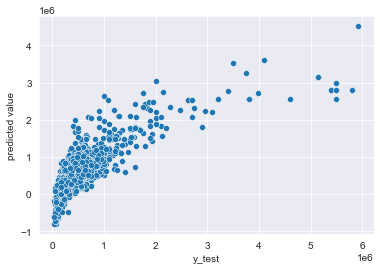

In [37]:
# Let's create a scatter plot
sns.scatterplot(x = y_test,y = pred_linear)
plt.xlabel('y_test')
plt.ylabel('predicted value')

**If we check the scatterplot, it is not linear which is not good for model.It says that the preidcted value varied the y_test value by large amount. Linear Regression would not work. Lets try SVR model and check if it does better then Linear regression.**

**SVR**

In [38]:
from sklearn.svm import SVR

# To find the best parameter for SVR model
from sklearn.model_selection import GridSearchCV

In [39]:
# HyperParameter Tunning
param_grid = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','linear','poly']
}

grid = GridSearchCV(SVR(),param_grid=param_grid,verbose=2,scoring='neg_mean_squared_error')

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
# Let's use these parameter to crete our SVR model
svr = SVR(C=100,gamma=1,kernel='linear')

svr.fit(X_train,y_train)

In [ ]:
# prediction
pred_svr = svr.predict(X_test)

Model Evaluation

In [ ]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test,pred_svr)

# Root Mean Squared Error
rmse_svr = np.sqrt(mse)

# r_2 score
r2_svr = metrics.r2_score(y_test,pred_svr)

print(f'MEAN SQUARED ERROR FOR SVR IS: {mse}')
print('\n')
print(f'ROOT MEAN SQUARED ERROR FOR SVR IS: {rmse_svr}')
print('\n')
print(f'R2 SCORE FOR SVR IS: {r2_svr}')

In [ ]:
# Let's create a scatter plot
sns.scatterplot(x = y_test,y = pred_svr)
plt.xlabel('y_test')
plt.ylabel('predicted value')

**Seeing the rmse scroe and scatterplot, we can conclude SVR model performed worse then Linear Regression**

**RandomForest**

In [40]:
from sklearn.ensemble import RandomForestRegressor

# To find the best parameter
from sklearn.model_selection import RandomizedSearchCV

In [41]:
random = RandomForestRegressor(n_jobs=-1)

hyper_parameters = {
    'max_depth' : [int(x) for x in np.linspace(5,40,8)],
    'n_estimators' : [int(x) for x in np.linspace(100,1500,15)],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split':[2,5,10,15,100]
}

rf_random = RandomizedSearchCV(estimator=random,param_distributions=hyper_parameters,scoring='neg_mean_squared_error',n_iter = 10,cv=5,verbose=2,n_jobs=-1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [43]:
# Let's check the best parameter
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [57]:
# Let's use these parameters to train our model
random = RandomForestRegressor(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=15)

In [58]:
random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [59]:
# prediction
pred_random = random.predict(X_test)

Model Evaluation

In [60]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test,pred_random)

# Root Mean Squared Error
rmse_random = np.sqrt(mse)

# r_2 score
r2_random = metrics.r2_score(y_test,pred_random)

print(f'MEAN SQUARED ERROR FOR RANDOM FOREST REGRESSOR IS: {mse}')
print('\n')
print(f'ROOT MEAN SQUARED ERROR FOR RANDOM FOREST REGRESSOR IS: {rmse_random}')
print('\n')
print(f'R2 SCORE FOR RANDOM FOREST REGRESSOR IS: {r2_random}')

MEAN SQUARED ERROR FOR RANDOM FOREST REGRESSOR IS: 15641623275.648415


ROOT MEAN SQUARED ERROR FOR RANDOM FOREST REGRESSOR IS: 125066.47542666426


R2 SCORE FOR RANDOM FOREST REGRESSOR IS: 0.9751029562130605


Text(0, 0.5, 'predicted value')

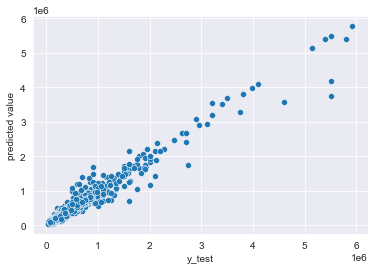

In [61]:
# Let's create a scatter plot
sns.scatterplot(x = y_test,y = pred_random)
plt.xlabel('y_test')
plt.ylabel('predicted value')

**If we check the scatter plot, it forms some what like a linear line.It shows our model performance is good**

**Random Forest performed very well as compared to Linear Regressor and SVR**

In [62]:
# Let's save the random forest model fro end to end deployment
# we will use pickle to do it
import pickle

In [64]:
pickle.dump(rf_random,open('car_price.pkl','wb'))

In [65]:
# Let's also save the scaler which can be used to scale the new values entered by the user
pickle.dump(scaler,open('scaler.pkl','wb'))

# THANK YOU